# Lecture 18: Introduction to P-Values Solutions
***

We'll need Numpy, Matplotlib, Pandas, and scipy.stats for this notebook, so let's load them. 

In [3]:
import numpy as np 
from scipy import stats
import pandas as pd
import matplotlib.pylab as plt 
%matplotlib inline

### Exercise 1 - Estimating the Distribution of P-Values 
*** 

Suppose you have a population that is normally distributed with mean $\mu_0$ and standard deviation $\sigma$. In this problem you will simulate many draws from this distribution with a particular sample size and compute p-values for the alternate hypothesis that that $\mu \neq \mu_0$.  Plot a histogram of the sampled p-values. Set the bin width to be equal to the significance level $\alpha$. What can you say about the distribution of p-values in the case where the Null hypothesis is actually true?  About what proportion of the sampled p-values are such that $p \leq \alpha$?      

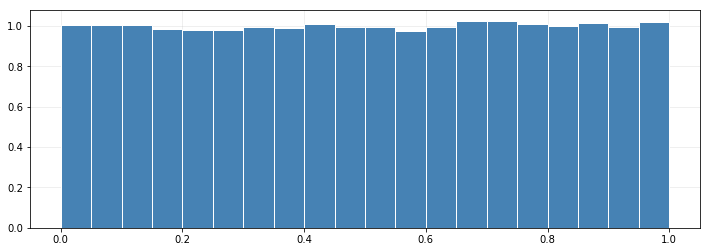

In [9]:
def pvalue_dist(num_tests=10000, sample_size=100, mu0=20, sig=2, alpha=0.05):
    
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,4))
    bins = np.linspace(0, 1, int(1/alpha)+1)
    ps = np.zeros(num_tests)
    for ii in range(num_tests):
        xbar = np.mean(stats.norm.rvs(mu0,sig,size=sample_size))
        z = (xbar-mu0)/(sig/np.sqrt(sample_size))
        ps[ii] = 2*np.min([stats.norm.cdf(z), 1-stats.norm.cdf(z)])
    pd.Series(ps).hist(ax=ax, color="steelblue", edgecolor="white", bins=bins, normed=True)
    ax.grid(alpha=0.25)
    ax.set_axisbelow(True)
    
pvalue_dist(num_tests=int(1e5), sample_size=500)

When the null hypothesis is true, the distribution of p-values is is uniform.  Since the bin width is equal to the significance level $\alpha$ we know that the the proportion of p-values that are less than or equal to $\alpha$ is exactly $\alpha$. 